In [81]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from scipy.stats import ttest_ind
from scipy.stats import pointbiserialr
from scipy.stats import ttest_1samp


In [82]:
# File to Load
diabetes_dataset_to_load = "Resources/diabetes_prediction_dataset.csv"

# Read the Diabetes Data File
diabetes_df = pd.read_csv(diabetes_dataset_to_load)
untouched_df = diabetes_df

In [83]:
diabetes_df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [84]:
# Display the data table for preview
diabetes_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [85]:
# Raw Data
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [86]:
# check for null values
diabetes_df.dropna(how='any', axis=0)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [87]:
diabetes_df['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [88]:
male_df = diabetes_df[diabetes_df['gender']=='Male']
female_df = diabetes_df[diabetes_df['gender']=='Female']
other_df = diabetes_df[diabetes_df['gender']=='Other']

# male_df
female_df
# other_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


# Summary statistics for each variable

In [89]:
statistical_var = ['age','bmi','HbA1c_level','blood_glucose_level']

column_var = ['gender','hypertension', 'heart_disease','smoking_history','diabetes']

In [90]:
diabetes_df[statistical_var].describe()

,age,bmi,HbA1c_level,blood_glucose_level
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,27.320767,5.527507,138.058060
std,22.516840,6.636783,1.070672,40.708136
min,0.080000,10.010000,3.500000,80.000000
25%,24.000000,23.630000,4.800000,100.000000
50%,43.000000,27.320000,5.800000,140.000000
75%,60.000000,29.580000,6.200000,159.000000
max,80.000000,95.690000,9.000000,300.000000


In [91]:
diabetes_df[column_var].describe()

,hypertension,heart_disease,diabetes
count,100000.00000,100000.000000,100000.000000
mean,0.07485,0.039420,0.085000
std,0.26315,0.194593,0.278883
min,0.00000,0.000000,0.000000
25%,0.00000,0.000000,0.000000
50%,0.00000,0.000000,0.000000
75%,0.00000,0.000000,0.000000
max,1.00000,1.000000,1.000000


In [92]:
mean = diabetes_df.groupby(['bmi'])['age'].mean()
median = diabetes_df.groupby(['bmi'])['age'].median()
var = diabetes_df.groupby(['bmi'])['age'].var()
std = diabetes_df.groupby(['bmi'])['age'].std()
sem = diabetes_df.groupby(['bmi'])['age'].sem()

bmi_age_df = pd.DataFrame({'Mean Age':mean, 'Median Age ':median, 'Age Variance':var, 'Age Std.Dev':std, 'Age Std Err':sem})

bmi_age_df 

,Mean Age,Median Age,Age Variance,Age Std.Dev,Age Std Err
bmi,,,,,
10.01,44.00,44.00,2592.0,50.911688,36.0
10.08,38.00,38.00,NaN,NaN,NaN
10.14,11.00,11.00,NaN,NaN,NaN
10.19,39.00,39.00,NaN,NaN,NaN
10.21,0.48,0.48,NaN,NaN,NaN
...,...,...,...,...,...
88.72,45.00,45.00,NaN,NaN,NaN
88.76,80.00,80.00,NaN,NaN,NaN
91.82,38.00,38.00,NaN,NaN,NaN


# plotting variables to see the relationship

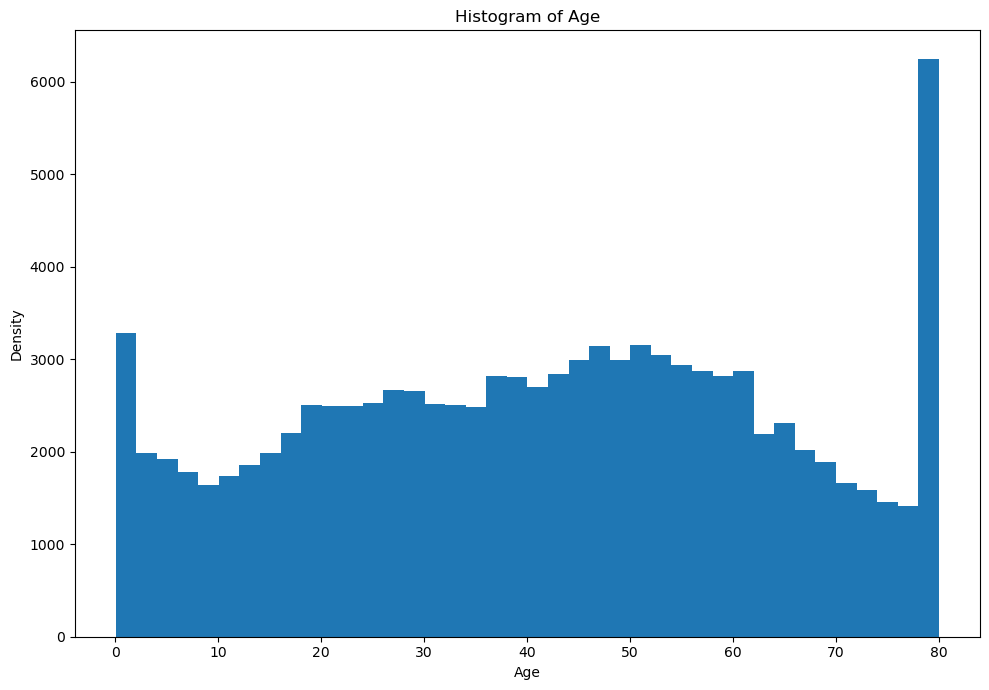

In [93]:
# Histogram showing density for the "age" variable
plt.figure(figsize=(10, 7))
plt.hist(diabetes_df['age'], bins=40)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Histogram of Age')
plt.tight_layout()
plt.show()

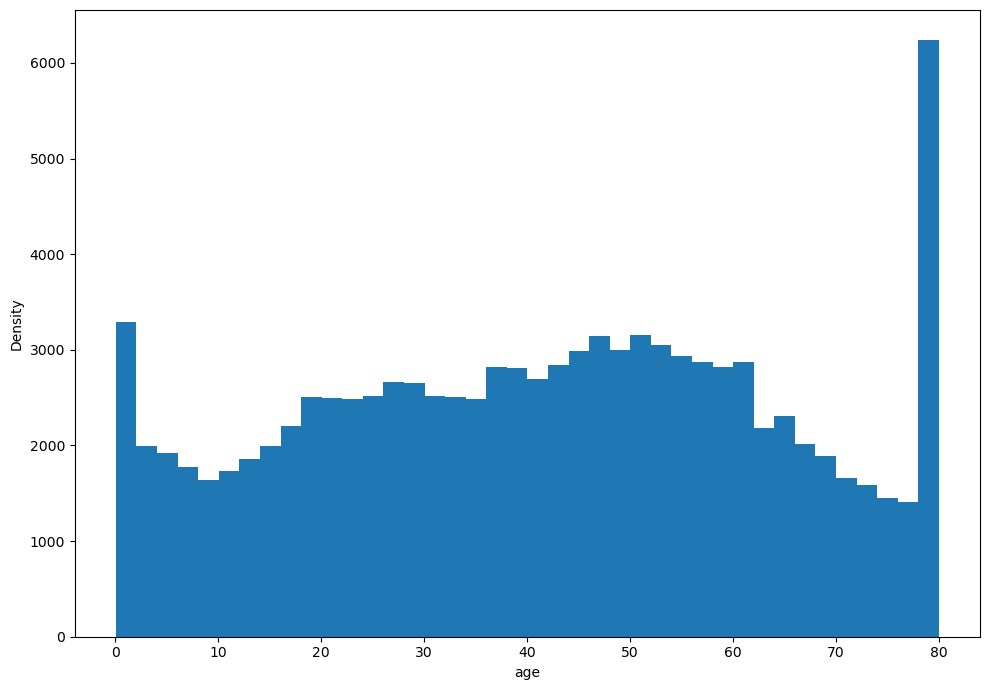

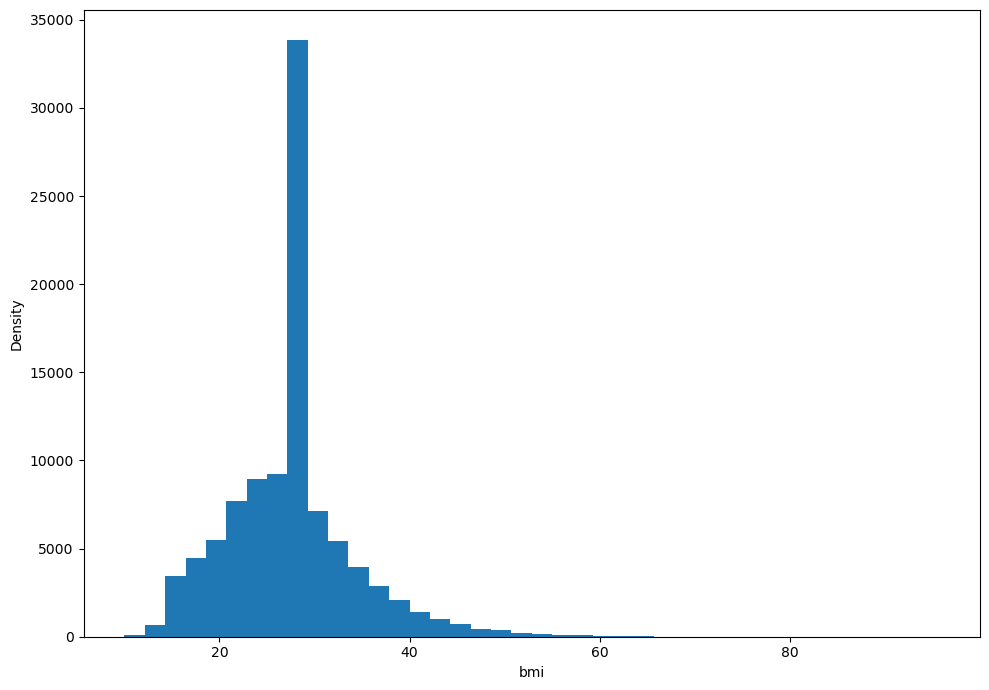

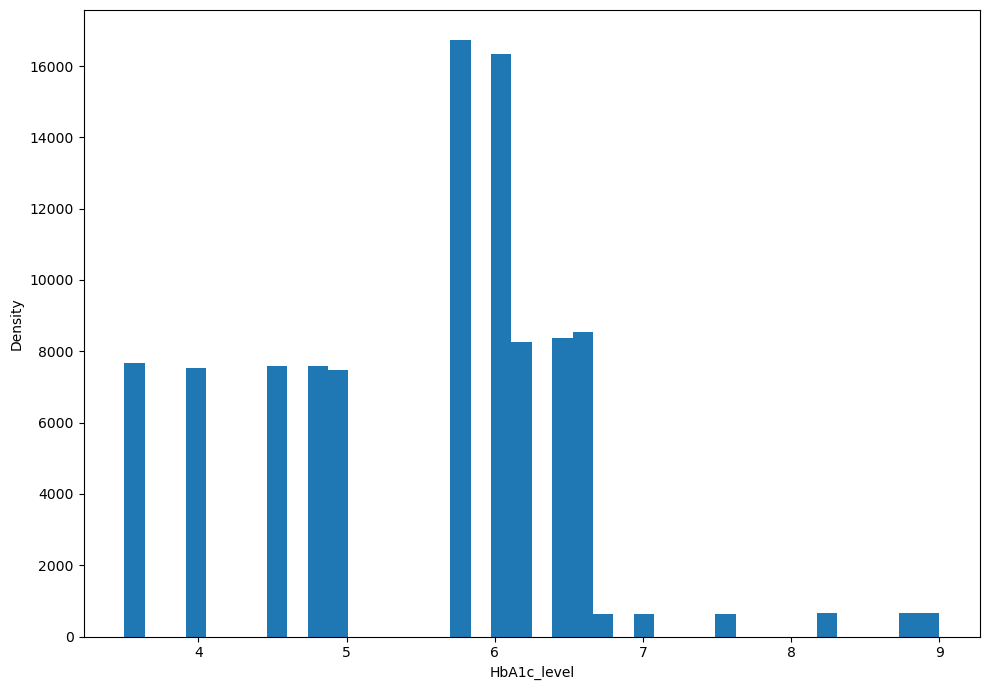

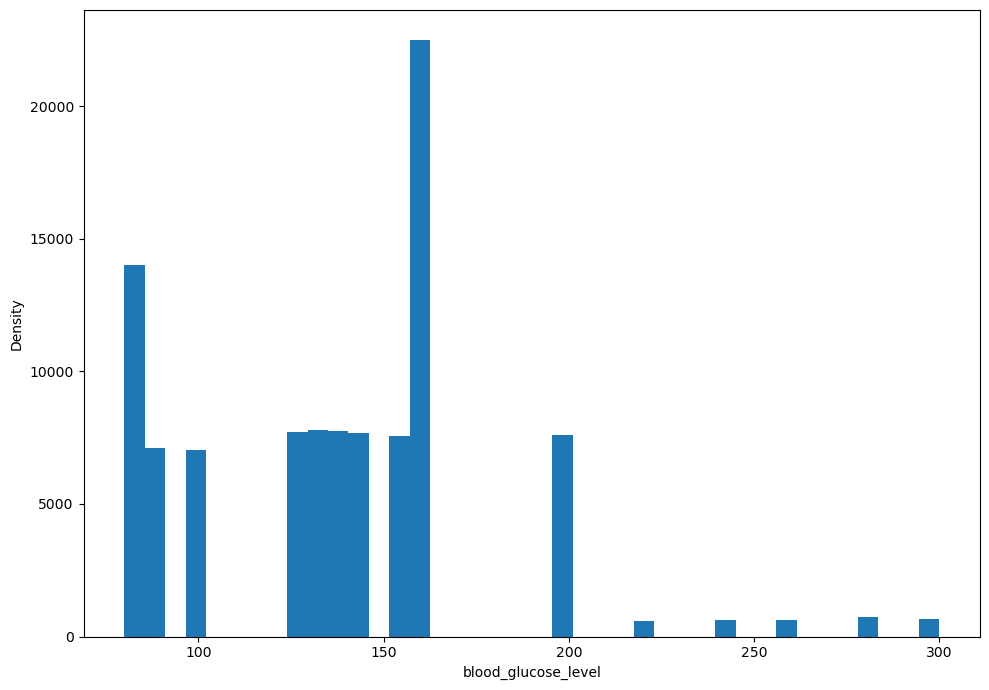

In [94]:
# histogram showing density 
for i in statistical_var:
    plt.figure(figsize=(10,7))
    plt.hist(diabetes_df[i],bins=40)
    plt.xlabel(i)
    plt.ylabel('Density')
    
    plt.tight_layout()
    plt.show()

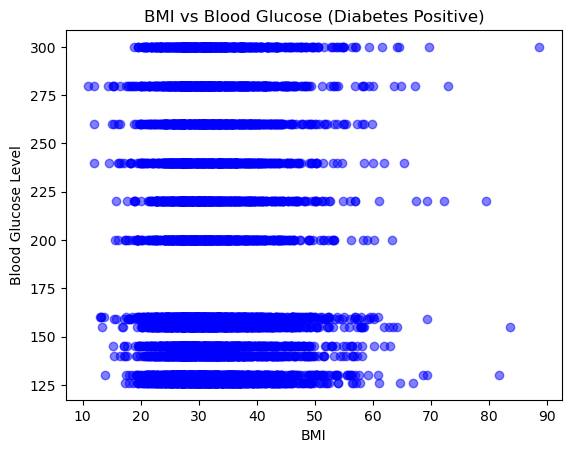

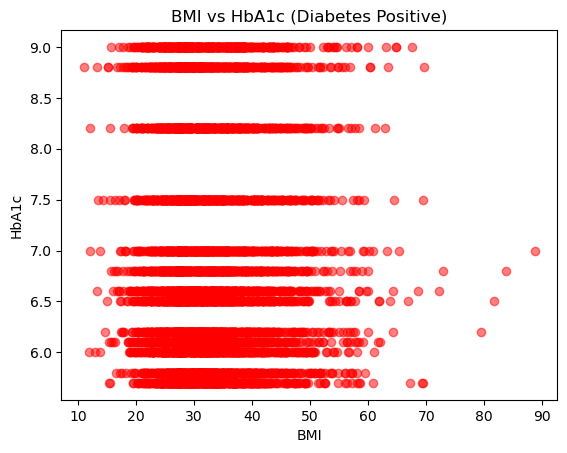

In [95]:
# Filter DataFrame to include only individuals diagnosed with diabetes
diabetes_positive_df = diabetes_df[diabetes_df['diabetes'] == 1]

# Scatter plot comparing BMI to Blood Glucose for individuals with diabetes
plt.scatter(diabetes_positive_df['bmi'], diabetes_positive_df['blood_glucose_level'], color='blue', alpha=0.5)
plt.title('BMI vs Blood Glucose (Diabetes Positive)')
plt.xlabel('BMI')
plt.ylabel('Blood Glucose Level')
plt.show()

# Scatter plot comparing BMI to Blood Glucose for individuals with diabetes
plt.scatter(diabetes_positive_df['bmi'], diabetes_positive_df['HbA1c_level'], color='red', alpha=0.5)
plt.title('BMI vs HbA1c (Diabetes Positive)')
plt.xlabel('BMI')
plt.ylabel('HbA1c')
plt.show()



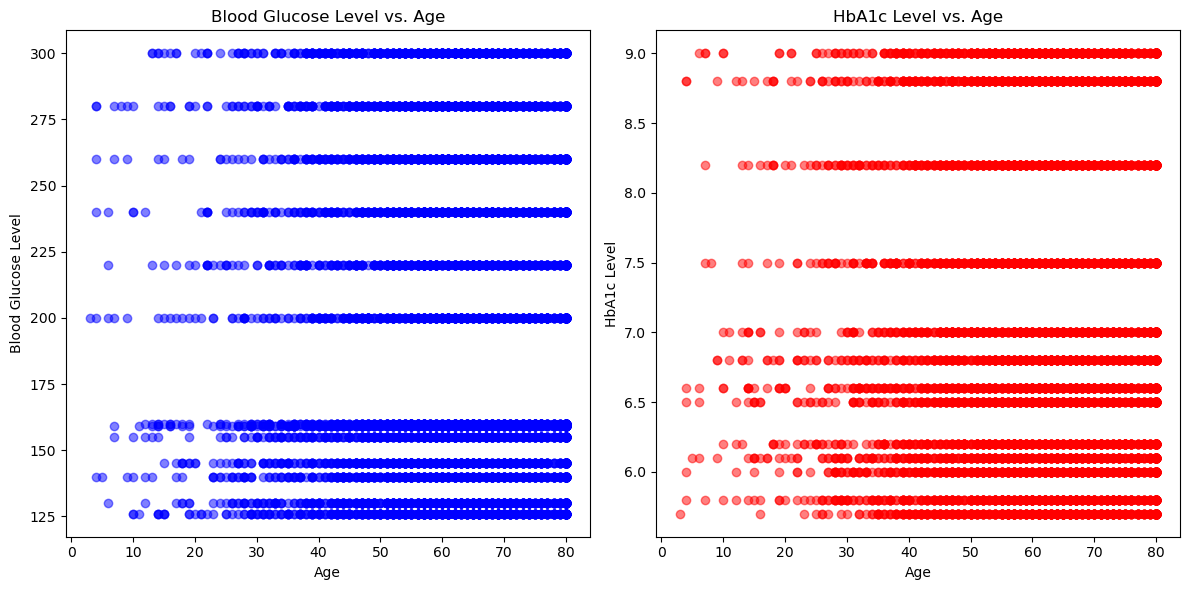

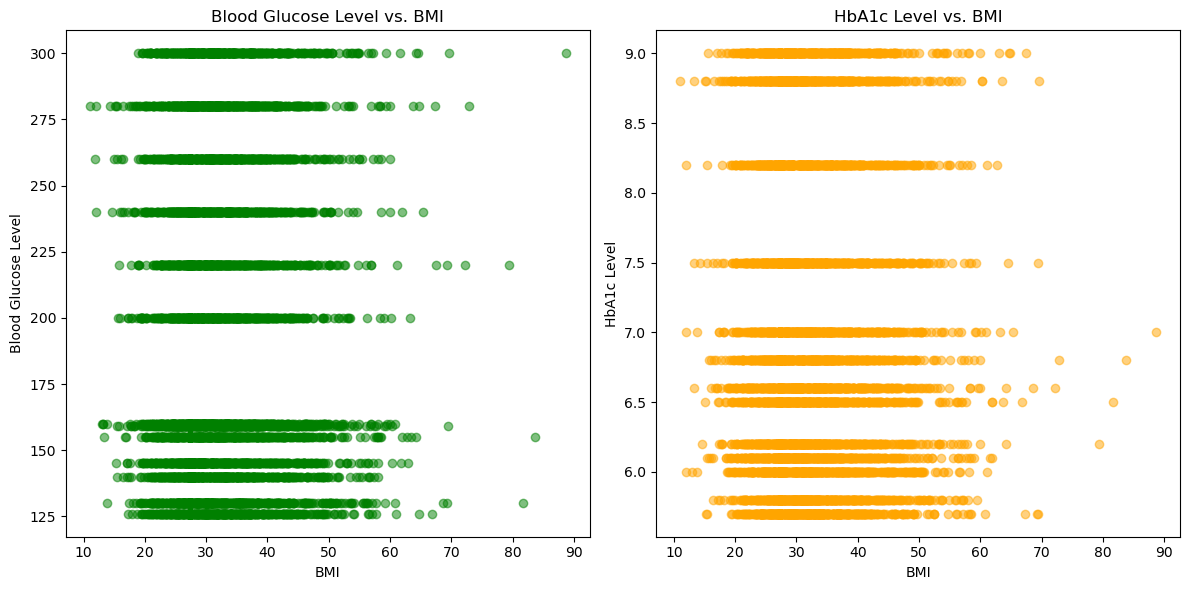

In [96]:

# Filter DataFrame to include only individuals diagnosed with diabetes
diabetes_positive_df = diabetes_df[diabetes_df['diabetes'] == 1]

# Extract variables for plotting
age_data = diabetes_positive_df['age']
bmi_data = diabetes_positive_df['bmi']
blood_glucose_data = diabetes_positive_df['blood_glucose_level']
hba1c_data = diabetes_positive_df['HbA1c_level']

# Create subplots for blood glucose vs. age and HbA1c vs. age
plt.figure(figsize=(12, 6))

# Blood Glucose vs. Age
plt.subplot(1, 2, 1)
plt.scatter(age_data, blood_glucose_data, color='blue', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Blood Glucose Level')
plt.title('Blood Glucose Level vs. Age')

# HbA1c vs. Age
plt.subplot(1, 2, 2)
plt.scatter(age_data, hba1c_data, color='red', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('HbA1c Level')
plt.title('HbA1c Level vs. Age')

plt.tight_layout()
plt.show()

# Create subplots for blood glucose vs. BMI and HbA1c vs. BMI
plt.figure(figsize=(12, 6))

# Blood Glucose vs. BMI
plt.subplot(1, 2, 1)
plt.scatter(bmi_data, blood_glucose_data, color='green', alpha=0.5)
plt.xlabel('BMI')
plt.ylabel('Blood Glucose Level')
plt.title('Blood Glucose Level vs. BMI')

# HbA1c vs. BMI
plt.subplot(1, 2, 2)
plt.scatter(bmi_data, hba1c_data, color='orange', alpha=0.5)
plt.xlabel('BMI')
plt.ylabel('HbA1c Level')
plt.title('HbA1c Level vs. BMI')

plt.tight_layout()
plt.show()

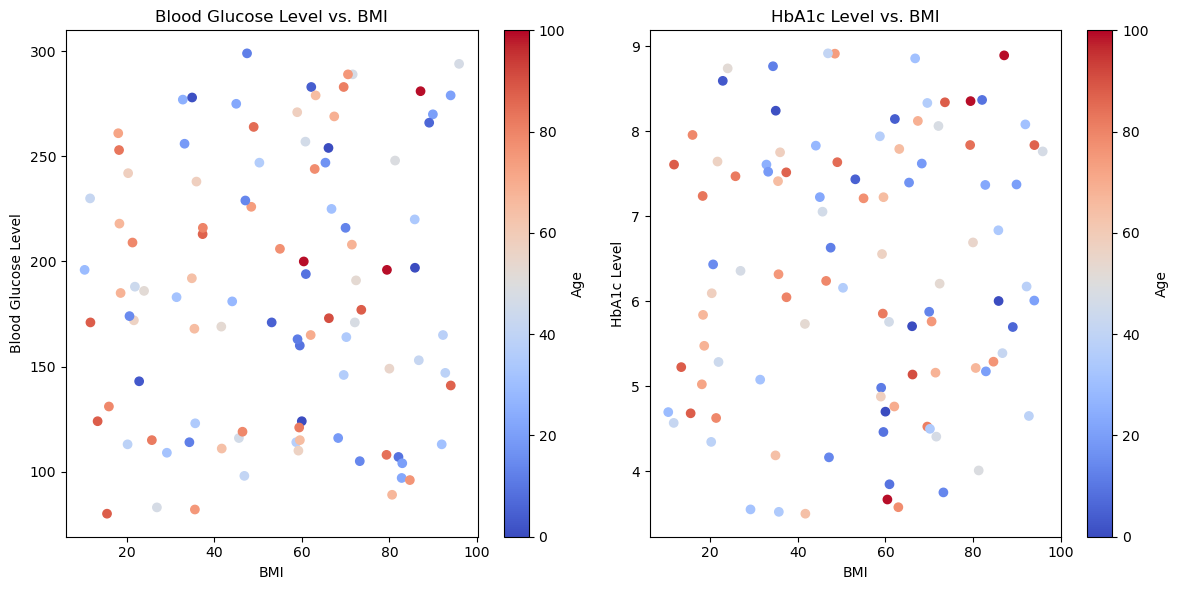

In [97]:
# Compare Age and BMI to both Blood Glucose Levels and HbA1c Levels
np.random.seed(0)
Age_BMI_BGL_HL_df = pd.DataFrame({
    'age': np.random.randint(0, 100, size=100),
    'bmi': np.random.uniform(10, 96, size=100),
    'blood_glucose_level': np.random.randint(80,300, size=100),
    'HbA1c_level': np.random.uniform(3.5, 9.0, size=100)
})

# Define age bins
age_bins = [0, 20, 40, 60, 80, 100]

# Bin ages
age_data_binned = pd.cut(Age_BMI_BGL_HL_df['age'], bins=age_bins)

# Define color levels for blood glucose and HbA1c levels
blood_glucose_colors = [min,max]  # Custom color levels for blood glucose levels
hba1c_colors = [min,max]           # Custom color levels for HbA1c levels

# Plot BMI against blood glucose level
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(Age_BMI_BGL_HL_df['bmi'], Age_BMI_BGL_HL_df['blood_glucose_level'], c=Age_BMI_BGL_HL_df['age'], cmap='coolwarm', label='Age', vmin=0, vmax=100)
plt.xlabel('BMI')
plt.ylabel('Blood Glucose Level')
plt.title('Blood Glucose Level vs. BMI')
plt.colorbar(label='Age')

# Plot BMI against HbA1c level
plt.subplot(1, 2, 2)
plt.scatter(Age_BMI_BGL_HL_df['bmi'], Age_BMI_BGL_HL_df['HbA1c_level'], c=Age_BMI_BGL_HL_df['age'], cmap='coolwarm', label='Age', vmin=0, vmax=100)
plt.xlabel('BMI')
plt.ylabel('HbA1c Level')
plt.title('HbA1c Level vs. BMI')
plt.colorbar(label='Age')

plt.tight_layout()
plt.show()


# Creating linear regressions and correlation coefficients for variables

In [98]:
# Conclusions about relationships between variables

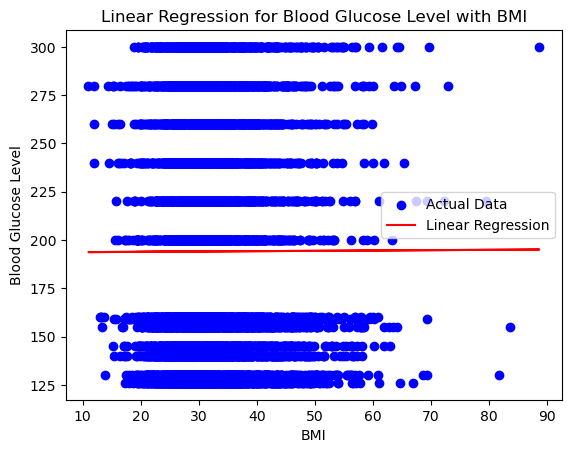

In [99]:
# Extract features (X) and target variable (y)
X = diabetes_positive_df[['bmi']]
y = diabetes_positive_df['blood_glucose_level']  # Only one target variable for linear regression

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Plot the actual data
plt.scatter(diabetes_positive_df['bmi'], diabetes_positive_df['blood_glucose_level'], color='blue', label='Actual Data')

# Plot the regression line
plt.plot(diabetes_positive_df['bmi'], model.predict(X), color='red', label='Linear Regression')

# Set labels and title
plt.xlabel('BMI')
plt.ylabel('Blood Glucose Level')
plt.title('Linear Regression for Blood Glucose Level with BMI')

# Add legend
plt.legend()

# Show the plot
plt.show()

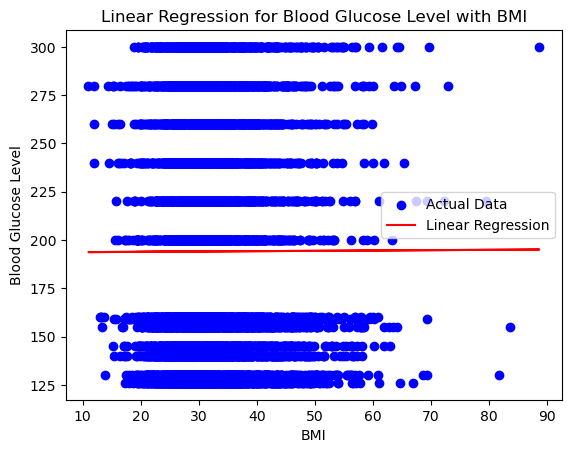

In [100]:
# Extract features (X) and target variable (y)
X = diabetes_positive_df[['bmi']]
y = diabetes_positive_df['blood_glucose_level']  # Only one target variable for linear regression

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Plot the actual data
plt.scatter(diabetes_positive_df['bmi'], diabetes_positive_df['blood_glucose_level'], color='blue', label='Actual Data')

# Plot the regression line
plt.plot(diabetes_positive_df['bmi'], model.predict(X), color='red', label='Linear Regression')

# Set labels and title
plt.xlabel('BMI')
plt.ylabel('Blood Glucose Level')
plt.title('Linear Regression for Blood Glucose Level with BMI')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [101]:
# t-tests
# Filter DataFrame to include individuals with diabetes (group 1) and without diabetes (group 2)
diabetes_positive_df = diabetes_df[diabetes_df['diabetes'] == 1]
diabetes_negative_df = diabetes_df[diabetes_df['diabetes'] == 0]

# Extract the relevant variable for the t-test
group1_data = diabetes_positive_df['blood_glucose_level']
group2_data = diabetes_negative_df['blood_glucose_level']

# Perform the t-test
t_statistic, p_value = ttest_ind(group1_data, group2_data)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)


T-statistic: 146.1610562407839
P-value: 0.0


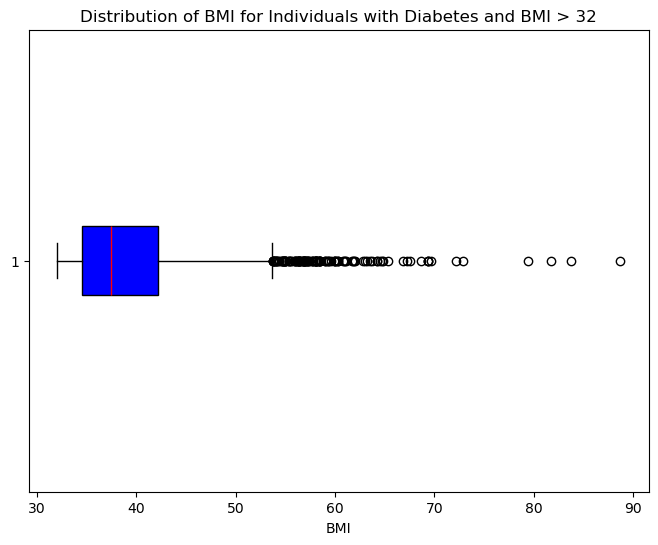

In [102]:
# Filter DataFrame to include individuals with diabetes and BMI over 32
diabetes_positive_high_bmi_df = diabetes_df[(diabetes_df['diabetes'] == 1) & (diabetes_df['bmi'] > 32)]

# Extract the relevant variable for the box plot
group1_data = diabetes_positive_high_bmi_df['bmi']

# Create a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(group1_data, vert=False, patch_artist=True, boxprops=dict(facecolor='blue', color='black'), medianprops=dict(color='red'))

# Add labels and title
plt.xlabel('BMI')
plt.title('Distribution of BMI for Individuals with Diabetes and BMI > 32')

# Show the plot
plt.show()

In [103]:
# Filter DataFrame to include individuals with diabetes and BMI over 32
diabetes_positive_high_bmi_df = diabetes_df[(diabetes_df['diabetes'] == 1) & (diabetes_df['bmi'] > 32)]

# Extract the relevant variable for the t-test
group1_data = diabetes_positive_high_bmi_df['bmi']

# Perform the one-sample t-test
t_statistic, p_value = ttest_1samp(group1_data, 32)

# Output the t-test result
print("One-sample t-test result:")
print(f"t-statistic: {t_statistic:.4f}")
print(f"p-value: {p_value:.4f}")


One-sample t-test result:
t-statistic: 65.4478
p-value: 0.0000
